1. Это набор данных признаков опухоли головного мозга. Он включает 5 признаков первого порядка и 8 признаков второго.
2. В датасете представлены следующие атрибуты:
 - Class - целевой класс. 1 = опухоль, 0 = нет опухоли
 - Mean - среднее значение (1 порядок)
 - Variance - дисперсия (1 порядок)
 - Standart deviation - стандартное отклонение (1 порядок)
 - Entropy - энтропия (2 порядок)
 - Skewness - ассиметрия (1 порядок)
 - Kurtosis - эксцесс (1 порядок)
 - Contrast - контраст (2 порядок)
 - Energy - энергия (2 порядок)
 - ASM - второй угловой момент (2 порядок)
 - Homogeneity - однородность (2 порядок)
 - Dissimilarity - непохожесть (2 порядок)
 - Correlation - корреляция (2 порядок)
 - Coarseness - грубость (2 порядок)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

df = pd.read_csv('Brain Tumor.csv')
df.head(10)

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
5,Image6,0,7.524109,607.395258,24.645390,0.214086,3.729886,14.471736,105.077882,0.421587,0.177736,0.598169,4.193146,0.976485,7.458341e-155
6,Image7,0,12.304413,922.746138,30.376737,0.128833,2.930095,8.969348,115.203118,0.320675,0.102832,0.532292,4.880320,0.974745,7.458341e-155
7,Image8,0,15.929474,1069.950248,32.710094,0.107658,2.484002,6.515889,94.874288,0.291321,0.084868,0.532262,4.242054,0.976774,7.458341e-155
8,Image9,0,19.921616,1166.120922,34.148513,0.094975,2.129173,4.905844,93.818920,0.272486,0.074248,0.526644,4.027167,0.974310,7.458341e-155
9,Image10,1,8.476196,1095.785127,33.102645,0.003002,4.365000,19.682514,72.588783,0.045685,0.002087,0.361432,4.590795,0.967830,7.458341e-155


Уберём столбец "Image", т.к. мы будем работать только с числовыми значениями

In [2]:
df.drop('Image', axis=1, inplace=True)
df.head(10)

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
5,0,7.524109,607.395258,24.645390,0.214086,3.729886,14.471736,105.077882,0.421587,0.177736,0.598169,4.193146,0.976485,7.458341e-155
6,0,12.304413,922.746138,30.376737,0.128833,2.930095,8.969348,115.203118,0.320675,0.102832,0.532292,4.880320,0.974745,7.458341e-155
7,0,15.929474,1069.950248,32.710094,0.107658,2.484002,6.515889,94.874288,0.291321,0.084868,0.532262,4.242054,0.976774,7.458341e-155
8,0,19.921616,1166.120922,34.148513,0.094975,2.129173,4.905844,93.818920,0.272486,0.074248,0.526644,4.027167,0.974310,7.458341e-155
9,1,8.476196,1095.785127,33.102645,0.003002,4.365000,19.682514,72.588783,0.045685,0.002087,0.361432,4.590795,0.967830,7.458341e-155


Почистим датасет

In [3]:
df.isna().sum()

Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Class               3762 non-null   int64  
 1   Mean                3762 non-null   float64
 2   Variance            3762 non-null   float64
 3   Standard Deviation  3762 non-null   float64
 4   Entropy             3762 non-null   float64
 5   Skewness            3762 non-null   float64
 6   Kurtosis            3762 non-null   float64
 7   Contrast            3762 non-null   float64
 8   Energy              3762 non-null   float64
 9   ASM                 3762 non-null   float64
 10  Homogeneity         3762 non-null   float64
 11  Dissimilarity       3762 non-null   float64
 12  Correlation         3762 non-null   float64
 13  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 411.6 KB


In [ ]:
df_num = df.select_dtypes('float64')
df_std = pd.DataFrame()
for col in df_num.columns:
  m = df_num[col].mean()
  s = df_num[col].std()
  df_std[col + '_n'] = (df_num[col] - m)/s
df_std.head(10)

<ipython-input-6-9e5a336802c5>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_std.columns)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


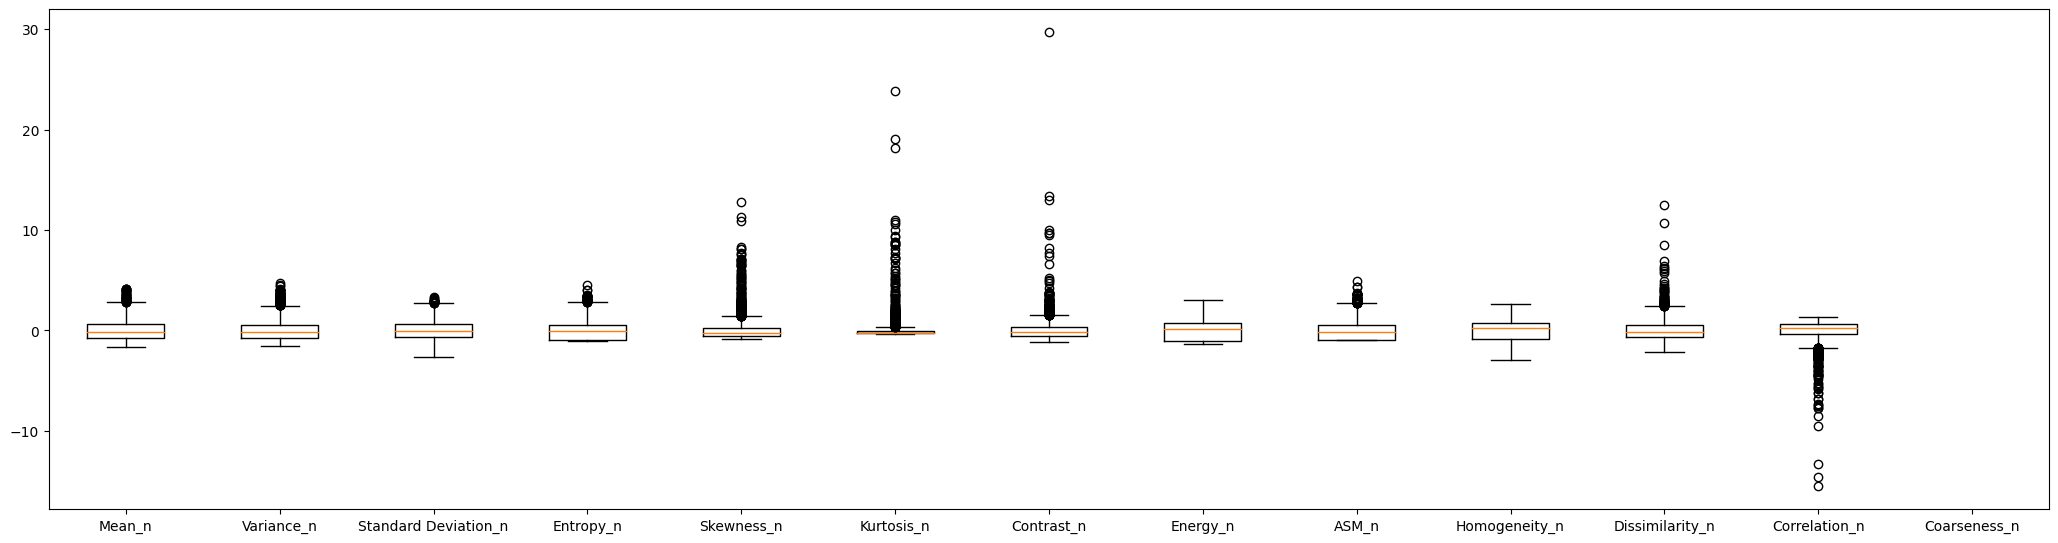

In [6]:
fig = plt.figure(figsize = (20, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(df_std.columns)

data = []
for col in df_std.columns:
  data.append(df_std[col])

bp = ax.boxplot(data, widths=0.5)
plt.show()

Уберём только самые аномальные значения, так как, скорее всего, отклонения от нормы соответствуют наличию опухоли у человека

In [7]:
df['Contrast'].describe()

count    3762.000000
mean      127.961459
std       109.499601
min         3.194733
25%        72.125208
50%       106.737418
75%       161.059006
max      3382.574163
Name: Contrast, dtype: float64

In [8]:
df[df.Contrast == df.Contrast.max()]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
823,1,0.467911,87.766753,9.368391,0.044348,21.032743,457.244577,3382.574163,0.181787,0.033046,0.30692,27.827751,0.757638,7.458341e-155


In [9]:
df.loc[(df.Contrast == df.Contrast.max()), 'Contrast'] = np.NaN
df[df.isna().sum(axis=1) > 0]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
823,1,0.467911,87.766753,9.368391,0.044348,21.032743,457.244577,NaN,0.181787,0.033046,0.30692,27.827751,0.757638,7.458341e-155


In [10]:
df_num = df.select_dtypes('float64')
imputer = KNNImputer(n_neighbors=5, weights='uniform')
imputer.fit(df_num)
df_num = pd.DataFrame(imputer.transform(df_num), index=df_num.index, columns=df_num.columns)
df['Contrast'] = df_num['Contrast']
df['Contrast'].describe()

count    3762.000000
mean      127.130495
std        95.799049
min         3.194733
25%        72.125208
50%       106.737418
75%       161.059006
max      1593.167391
Name: Contrast, dtype: float64

In [11]:
df.loc[[823]]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
823,1,0.467911,87.766753,9.368391,0.044348,21.032743,457.244577,256.488428,0.181787,0.033046,0.30692,27.827751,0.757638,7.458341e-155


In [12]:
df['Kurtosis'].describe()

count    3762.000000
mean       24.389071
std        56.434747
min         3.942402
25%         7.252852
50%        12.359088
75%        22.640304
max      1371.640060
Name: Kurtosis, dtype: float64

In [13]:
df[df.Kurtosis == df.Kurtosis.max()]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
3183,1,0.104172,14.593951,3.820203,0.030357,36.931294,1371.64006,102.571429,0.146772,0.021542,0.227913,7.428571,0.549426,7.458341e-155


In [14]:
df.loc[(df.Kurtosis == df.Kurtosis.max()), 'Kurtosis'] = np.NaN
df[df.isna().sum(axis=1) > 0]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
3183,1,0.104172,14.593951,3.820203,0.030357,36.931294,NaN,102.571429,0.146772,0.021542,0.227913,7.428571,0.549426,7.458341e-155


In [15]:
df[df.Kurtosis == df.Kurtosis.max()]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
2461,1,0.113998,13.856761,3.722467,0.055269,33.008615,1099.56351,941.319444,0.202464,0.040992,0.430795,10.569444,0.815816,7.458341e-155


In [16]:
df.loc[(df.Kurtosis == df.Kurtosis.max()), 'Kurtosis'] = np.NaN
df[df.isna().sum(axis=1) > 0]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
2461,1,0.113998,13.856761,3.722467,0.055269,33.008615,NaN,941.319444,0.202464,0.040992,0.430795,10.569444,0.815816,7.458341e-155
3183,1,0.104172,14.593951,3.820203,0.030357,36.931294,NaN,102.571429,0.146772,0.021542,0.227913,7.428571,0.549426,7.458341e-155


In [17]:
df[df.Kurtosis == df.Kurtosis.max()]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
3024,1,0.134689,17.171333,4.143831,0.015571,31.930094,1050.866388,85.5625,0.104232,0.010864,0.202736,7.40625,0.928907,7.458341e-155


In [18]:
df.loc[(df.Kurtosis == df.Kurtosis.max()), 'Kurtosis'] = np.NaN
df[df.isna().sum(axis=1) > 0]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
2461,1,0.113998,13.856761,3.722467,0.055269,33.008615,NaN,941.319444,0.202464,0.040992,0.430795,10.569444,0.815816,7.458341e-155
3024,1,0.134689,17.171333,4.143831,0.015571,31.930094,NaN,85.562500,0.104232,0.010864,0.202736,7.406250,0.928907,7.458341e-155
3183,1,0.104172,14.593951,3.820203,0.030357,36.931294,NaN,102.571429,0.146772,0.021542,0.227913,7.428571,0.549426,7.458341e-155


In [19]:
df_num = df.select_dtypes('float64')
imputer = KNNImputer(n_neighbors=5, weights='uniform')
imputer.fit(df_num)
df_num = pd.DataFrame(imputer.transform(df_num), index=df_num.index, columns=df_num.columns)
df['Kurtosis'] = df_num['Kurtosis']
df['Kurtosis'].describe()

count    3762.000000
mean       23.715792
std        46.791467
min         3.942402
25%         7.252852
50%        12.359088
75%        22.640304
max       647.021532
Name: Kurtosis, dtype: float64

In [20]:
df.loc[[2461]]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
2461,1,0.113998,13.856761,3.722467,0.055269,33.008615,373.376895,941.319444,0.202464,0.040992,0.430795,10.569444,0.815816,7.458341e-155


In [21]:
df.loc[[3024]]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
3024,1,0.134689,17.171333,4.143831,0.015571,31.930094,312.351893,85.5625,0.104232,0.010864,0.202736,7.40625,0.928907,7.458341e-155


In [22]:
df.loc[[3183]]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
3183,1,0.104172,14.593951,3.820203,0.030357,36.931294,303.466258,102.571429,0.146772,0.021542,0.227913,7.428571,0.549426,7.458341e-155


<ipython-input-23-d94c8c1050ef>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_std.columns)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

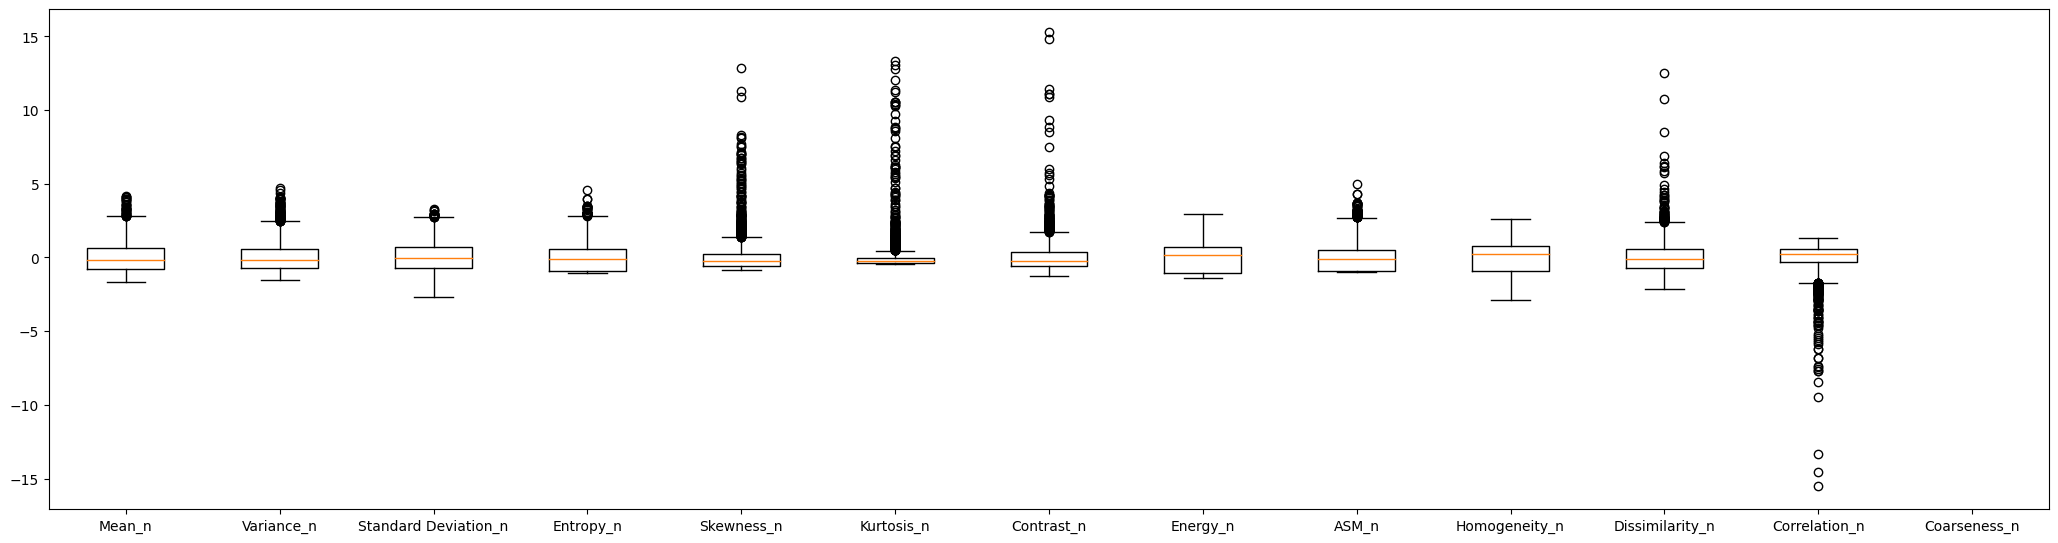

In [23]:
df_std = pd.DataFrame()
for col in df_num.columns:
  m = df_num[col].mean()
  s = df_num[col].std()
  df_std[col + '_n'] = (df_num[col] - m)/s

  fig = plt.figure(figsize = (20, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(df_std.columns)

data = []
for col in df_std.columns:
  data.append(df_std[col])

bp = ax.boxplot(data, widths=0.5)
plt.show()

In [24]:
df['Correlation'].describe()

count    3762.000000
mean        0.955767
std         0.026157
min         0.549426
25%         0.947138
50%         0.961610
75%         0.971355
max         0.989972
Name: Correlation, dtype: float64

In [25]:
df[df.Correlation == df.Correlation.min()]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
3183,1,0.104172,14.593951,3.820203,0.030357,36.931294,303.466258,102.571429,0.146772,0.021542,0.227913,7.428571,0.549426,7.458341e-155


In [26]:
df.loc[(df.Correlation == df.Correlation.min()), 'Correlation'] = np.NaN
df[df.isna().sum(axis=1) > 0]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
3183,1,0.104172,14.593951,3.820203,0.030357,36.931294,303.466258,102.571429,0.146772,0.021542,0.227913,7.428571,NaN,7.458341e-155


In [27]:
df[df.Correlation == df.Correlation.min()]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
2393,1,0.276703,26.875117,5.184122,0.007298,21.416268,504.924765,1219.838542,0.071318,0.005086,0.218292,24.526042,0.574238,7.458341e-155


In [28]:
df.loc[(df.Correlation == df.Correlation.min()), 'Correlation'] = np.NaN
df[df.isna().sum(axis=1) > 0]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
2393,1,0.276703,26.875117,5.184122,0.007298,21.416268,504.924765,1219.838542,0.071318,0.005086,0.218292,24.526042,NaN,7.458341e-155
3183,1,0.104172,14.593951,3.820203,0.030357,36.931294,303.466258,102.571429,0.146772,0.021542,0.227913,7.428571,NaN,7.458341e-155


In [29]:
df[df.Correlation == df.Correlation.min()]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
3684,1,0.225571,19.654984,4.433394,0.008242,20.448315,431.362963,341.994048,0.075761,0.00574,0.218318,8.208333,0.606712,7.458341e-155


In [30]:
df.loc[(df.Correlation == df.Correlation.min()), 'Correlation'] = np.NaN
df[df.isna().sum(axis=1) > 0]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
2393,1,0.276703,26.875117,5.184122,0.007298,21.416268,504.924765,1219.838542,0.071318,0.005086,0.218292,24.526042,NaN,7.458341e-155
3183,1,0.104172,14.593951,3.820203,0.030357,36.931294,303.466258,102.571429,0.146772,0.021542,0.227913,7.428571,NaN,7.458341e-155
3684,1,0.225571,19.654984,4.433394,0.008242,20.448315,431.362963,341.994048,0.075761,0.005740,0.218318,8.208333,NaN,7.458341e-155


In [31]:
df_num = df.select_dtypes('float64')
imputer = KNNImputer(n_neighbors=5, weights='uniform')
imputer.fit(df_num)
df_num = pd.DataFrame(imputer.transform(df_num), index=df_num.index, columns=df_num.columns)
df['Correlation'] = df_num['Correlation']
df['Correlation'].describe()

count    3762.000000
mean        0.955995
std         0.024015
min         0.707803
25%         0.947138
50%         0.961610
75%         0.971355
max         0.989972
Name: Correlation, dtype: float64

In [32]:
df.loc[[2393]]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
2393,1,0.276703,26.875117,5.184122,0.007298,21.416268,504.924765,1219.838542,0.071318,0.005086,0.218292,24.526042,0.8479,7.458341e-155


In [33]:
df.loc[[3183]]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
3183,1,0.104172,14.593951,3.820203,0.030357,36.931294,303.466258,102.571429,0.146772,0.021542,0.227913,7.428571,0.903967,7.458341e-155


In [ ]:
df.loc[[3684]]

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
3684,1,0.225571,19.654984,4.433394,0.008242,20.448315,431.362963,341.994048,0.075761,0.00574,0.218318,8.208333,0.836653,7.458341e-155


<ipython-input-34-d94c8c1050ef>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_std.columns)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

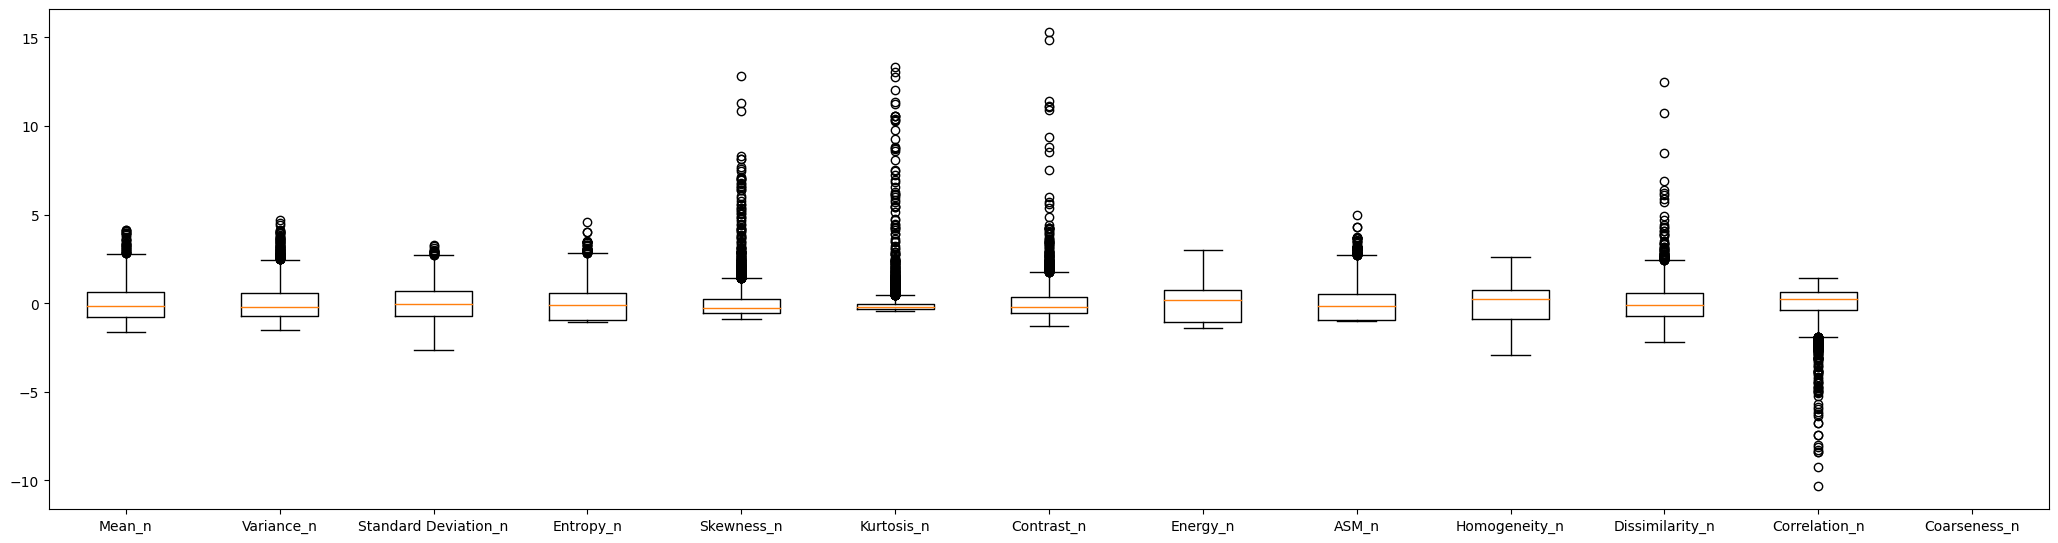

In [34]:
df_std = pd.DataFrame()
for col in df_num.columns:
  m = df_num[col].mean()
  s = df_num[col].std()
  df_std[col + '_n'] = (df_num[col] - m)/s

  fig = plt.figure(figsize = (20, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(df_std.columns)

data = []
for col in df_std.columns:
  data.append(df_std[col])

bp = ax.boxplot(data, widths=0.5)
plt.show()

Разделим выборку на обучающую и отложенную

In [35]:
y = df['Class']
X = df.drop('Class', axis=1)
X.shape, y.shape

((3762, 13), (3762,))

In [ ]:
np.count_nonzero(y == 1)

1683

In [ ]:
np.count_nonzero(y == 0)

2079

In [36]:
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

In [ ]:
X_train.shape, X_valid.shape

((2633, 13), (1129, 13))

In [ ]:
y_train.shape, y_valid.shape

((2633,), (1129,))

In [37]:
from sklearn.tree import DecisionTreeClassifier

first_tree = DecisionTreeClassifier(random_state=17)
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5)) #средняя доля верных ответов

0.9840513416209118

In [38]:
from sklearn.neighbors import KNeighborsClassifier

first_knn = KNeighborsClassifier()
np.mean(cross_val_score(first_knn, X_train, y_train, cv=5)) #средняя доля верных ответов

0.8066882634324429

Настраиваем max_depth для дерева

In [53]:
from sklearn.model_selection import GridSearchCV
import time

tree_params = {"max_depth": np.arange(1, 11), "max_features": [0.5, 0.7, 1]}
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)
start_time = time.time()
tree_grid.fit(X_train, y_train)
end_time = time.time()

In [ ]:
tree_grid.best_score_, tree_grid.best_params_

(0.9821487579454693, {'max_depth': 9, 'max_features': 0.7})

In [54]:
end_time - start_time

9.527908563613892

In [56]:
knn_params = {"n_neighbors": [1, 2, 3, 4] + list(range(5, 30, 5))}
start_time = time.time()
knn_grid = GridSearchCV(first_knn, knn_params, cv=5)
start_time = time.time()
knn_grid.fit(X_train, y_train)
end_time = time.time()

In [ ]:
knn_grid.best_score_, knn_grid.best_params_

(0.8188375264247731, {'n_neighbors': 3})

In [57]:
end_time - start_time

3.6783103942871094

Делаем прогноз для отложенной выборки

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, f1_score, RocCurveDisplay

In [42]:
tree_valid_pred = tree_grid.predict(X_valid)
knn_valid_pred = knn_grid.predict(X_valid)

Оценим Accuracy

In [ ]:
accuracy_score(y_valid, tree_valid_pred)

0.9813994685562445

In [ ]:
accuracy_score(y_valid, knn_valid_pred)

0.8193091231178034

Оценим Precision

In [ ]:
precision_score(y_valid, tree_valid_pred)

0.9782178217821782

In [ ]:
precision_score(y_valid, knn_valid_pred)

0.8177966101694916

Оценим Recall

In [ ]:
recall_score(y_valid, tree_valid_pred)

0.9801587301587301

In [ ]:
recall_score(y_valid, knn_valid_pred)

0.7658730158730159

Оценим F-меру

In [ ]:
f1_score(y_valid, tree_valid_pred)

0.9791873141724479

In [ ]:
f1_score(y_valid, knn_valid_pred)

0.790983606557377

Оценим ROC

In [61]:
tree_pred_proba = tree_grid.predict_proba(X_valid)
tree_pred_proba

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [59]:
knn_pred_proba = knn_grid.predict_proba(X_valid)
knn_pred_proba

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667]])

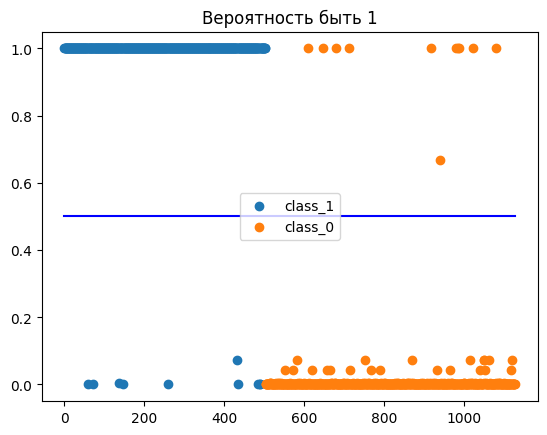

In [62]:
threshold = 0.5
class_1 = tree_pred_proba[:, 1][y_valid == 1]
class_0 = tree_pred_proba[:, 1][y_valid == 0]

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.plot([-0.2, len(tree_pred_proba[:, 1])], [threshold, threshold], c='b')
plt.title('Вероятность быть 1')
plt.legend();

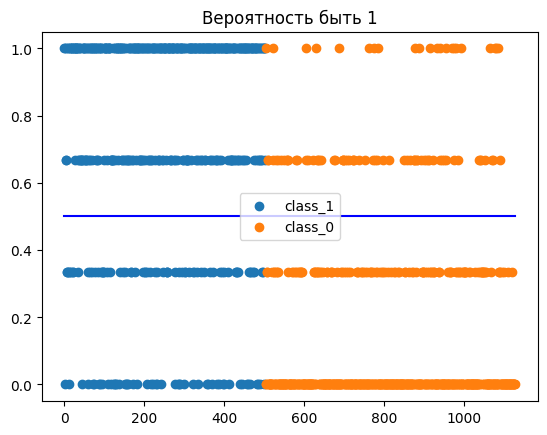

In [63]:
class_1 = knn_pred_proba[:, 1][y_valid == 1]
class_0 = knn_pred_proba[:, 1][y_valid == 0]

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.plot([-0.2, len(knn_pred_proba[:, 1])], [threshold, threshold], c='b')
plt.title('Вероятность быть 1')
plt.legend();

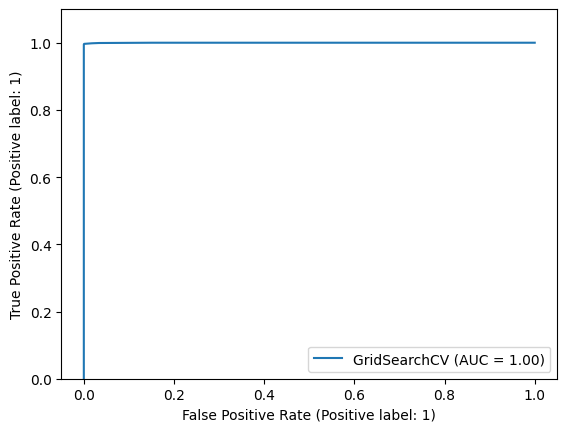

In [ ]:
RocCurveDisplay.from_estimator(tree_grid, X_train, y_train)
plt.ylim([0, 1.1]);

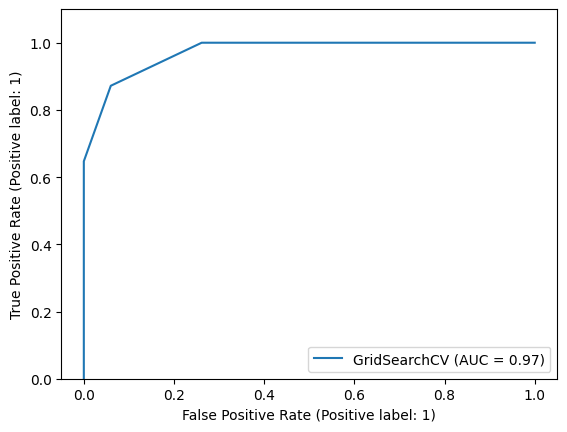

In [ ]:
RocCurveDisplay.from_estimator(knn_grid, X_train, y_train)
plt.ylim([0, 1.1]);

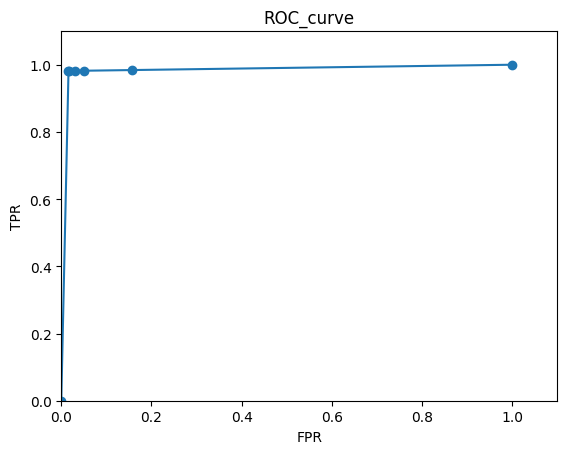

In [ ]:
fprs, tprs, thr = roc_curve(y_valid, tree_pred_proba[:, 1])

plt.plot(fprs, tprs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

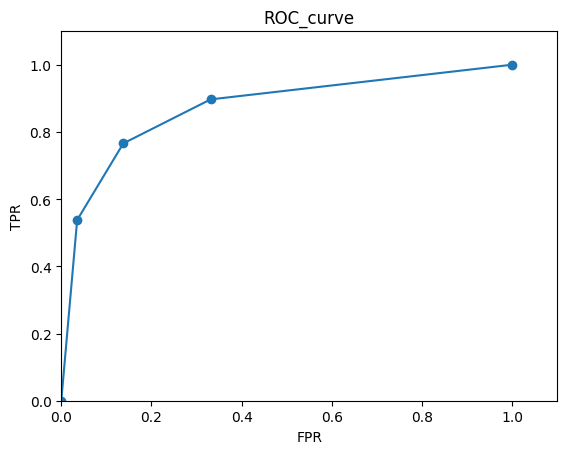

In [ ]:
fprs, tprs, thr = roc_curve(y_valid, knn_pred_proba[:, 1])

plt.plot(fprs, tprs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

In [44]:
from sklearn.tree import export_graphviz

In [45]:
export_graphviz(tree_grid.best_estimator_, out_file="tree.dot",
                feature_names=X.columns, filled=True)

In [46]:
!ls -l *.dot

-rw-r--r-- 1 root root 6895 Dec  8 17:09 tree.dot


In [47]:
!dot -Tpng tree.dot -o tree.png

In [48]:
!ls -l *.png

-rw-r--r-- 1 root root 427841 Dec  8 17:10 tree.png


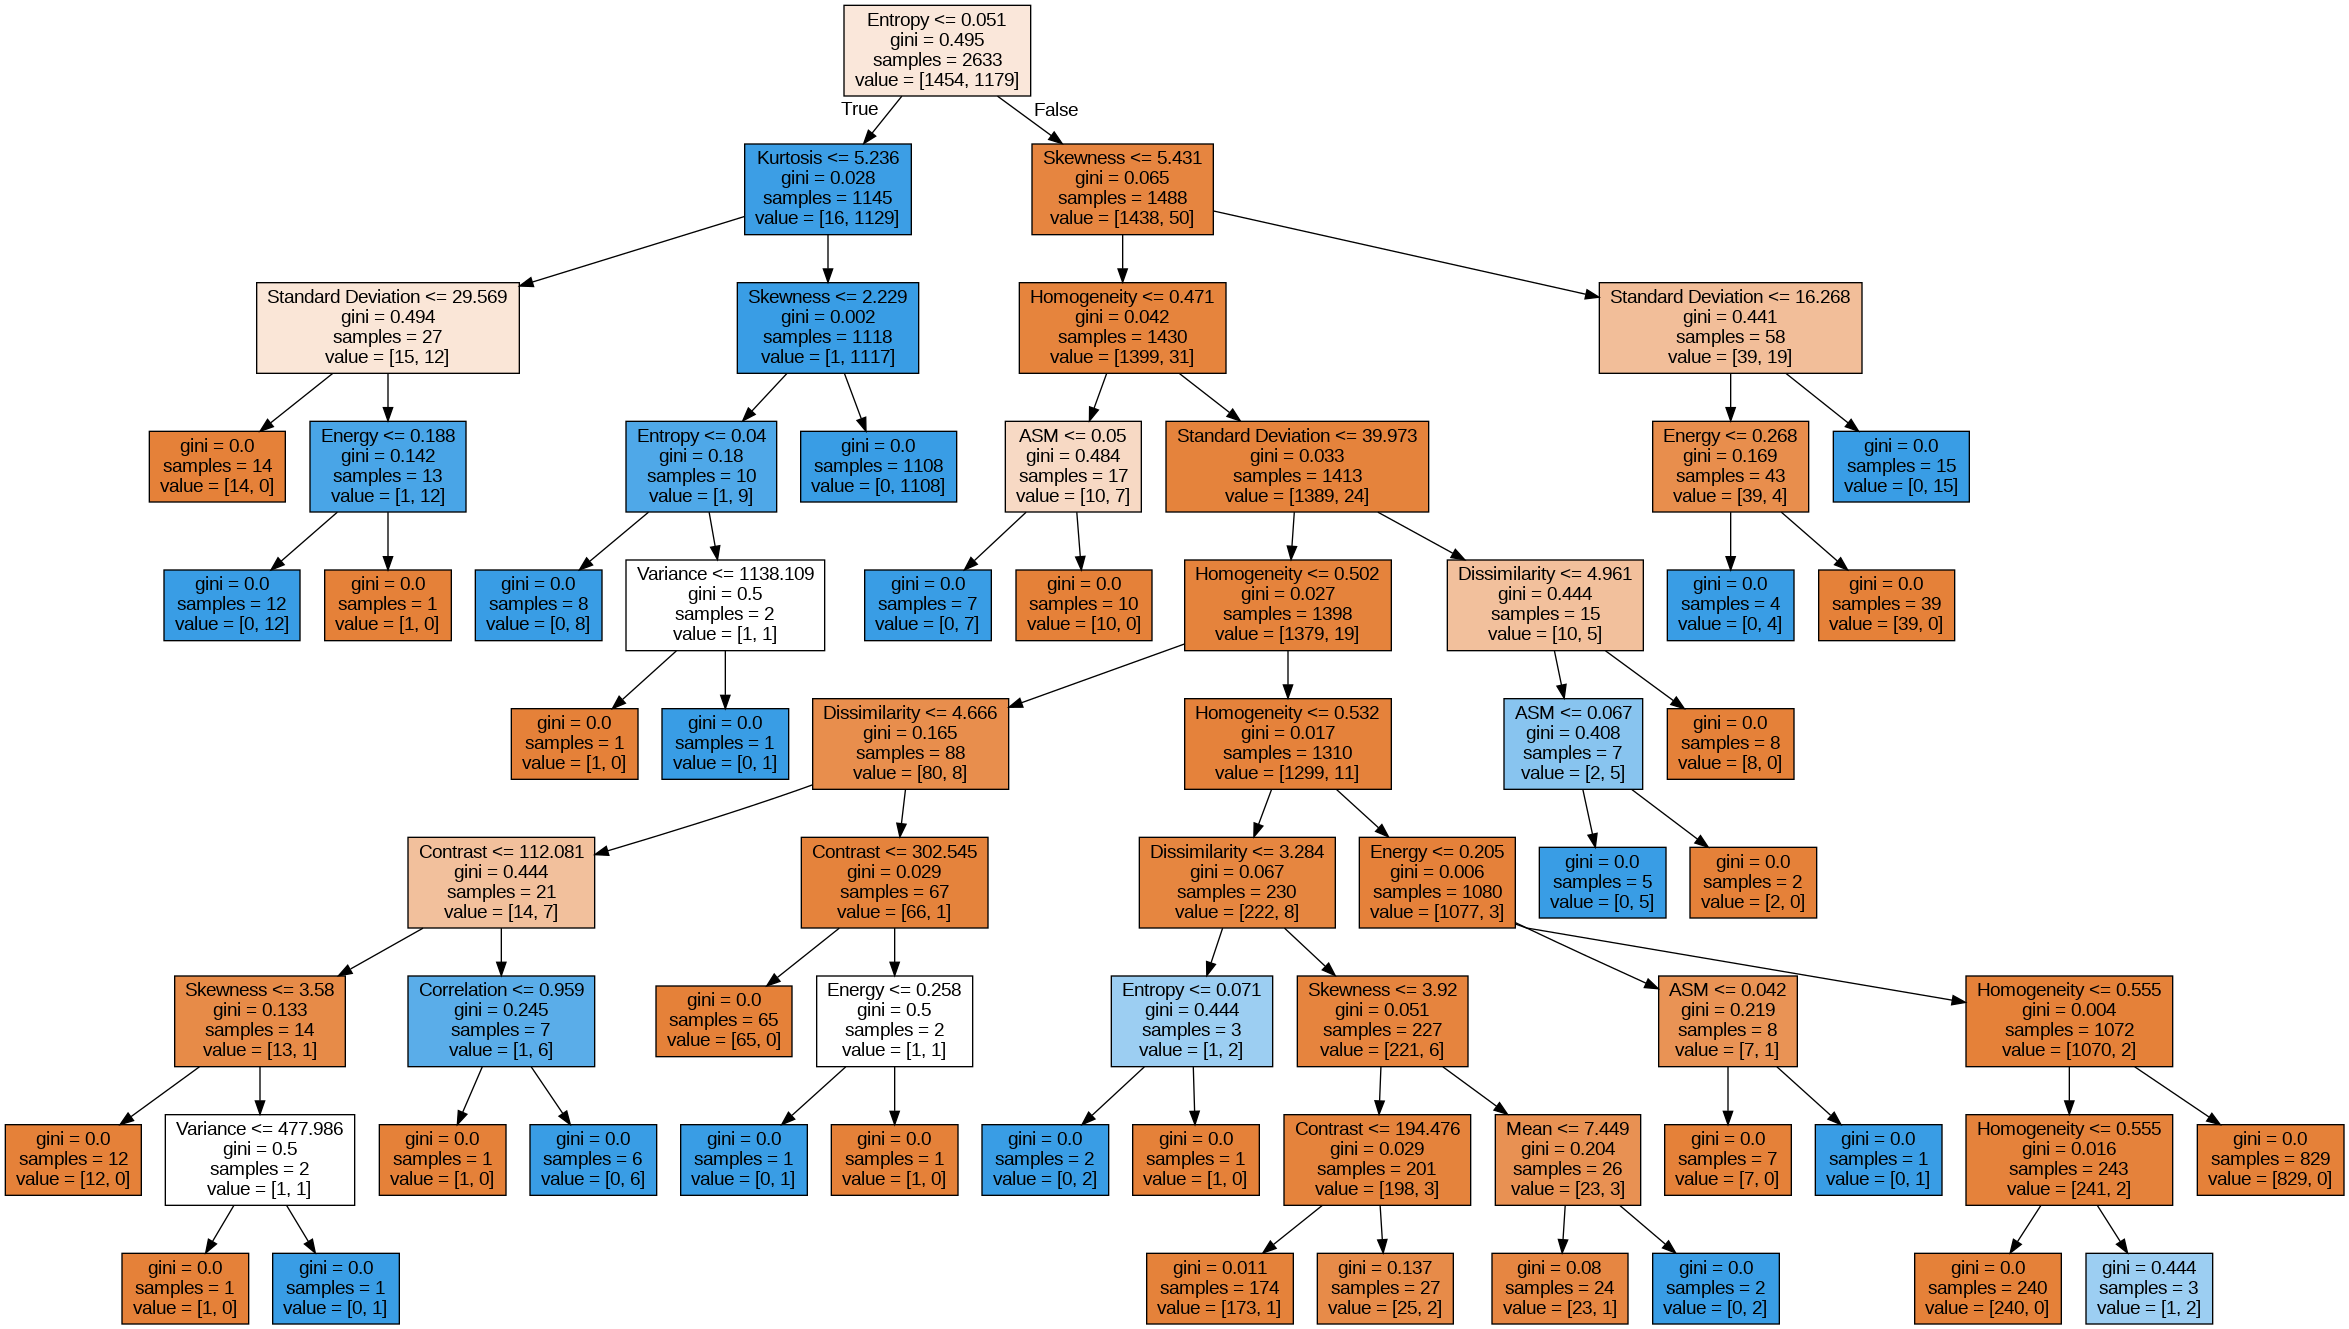

In [50]:
from IPython.display import Image
Image('tree.png')